## 순환 신경망으로 IMDB 리뷰 분류하기

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

각각 2500개의 샘플로 이루어진 데이터들

리뷰 텍스트 길이가 제각각이라 고정크기의 2차원 배열보다는 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용가능

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[1]), len(train_input[0])) #서로 다른 길이

189 218


#### 이미 정수로 변환되어있는 IMDB 리뷰 데이터

단어들을 정수로! (숫자의 크기는 의미 없음)

In [4]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


#### 부정인지 긍정인지 / 1 = 긍정, 0 = 부정

In [5]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target,
                                                                   test_size = 0.2, random_state = 42)

#### 각 리뷰의 길이를 계산해 넘파이 배열에 담자 / 이유는? 평균적인 리뷰 길이와 짧은 & 긴 리뷰 길이 파악

In [7]:
import numpy as np

lengths = np.array([len(x) for x in train_input])
print(lengths)

[259 520 290 ... 300  70  77]


평균이 239인데, 중간값이 178 인것을 보아 한쪽으로 치우친 분포를 보일것

In [8]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


대부분 길이는 300이하

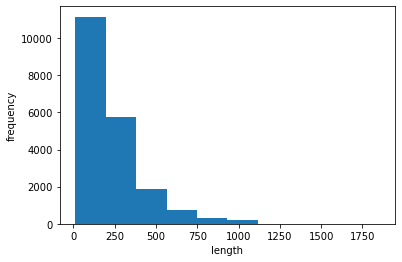

In [9]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

### pad_sequences() 함수를 통해 train_input 길이를 100으로 맞추기

maxlen 보다 긴 경우는 잘라내고 짧은 경우는 0으로 대체

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen= 100)

#### (샘플개수, 토큰(타임스텝) 개수)

1 토큰 : 하나의 단어

In [11]:
print(train_seq.shape)

(20000, 100)


In [12]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


앞부분이 짤렸는지 뒷부분이 짤렸는지 원본의 뒤 10개 데이터 비교하기

In [13]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


보통 앞부분을 잘라낸다 / 이유는? 뒤에 정보가 더 많은 것이라고 예상

뒷부분을 잘라내고 싶다면 매개번수 truncating = 'pre' 가 아닌 'post'로 하면됨

#### 앞부분을 0으로 채운것을 보아 100이 안되는 train_seq[5]

In [14]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [15]:
val_seq = pad_sequences(val_input, maxlen = 100)

In [16]:
print(train_seq.shape)

(20000, 100)


## 순환 신경망 만들기

SimpleRNN 사용

input_shape = (100,500) --->  100은 샘플의 길이 500 은500개 단어의 개수만 사용하는 imdb 의 단어 개수

#### 토큰을 정수로 변환한 이 데이터를 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만든다

이걸 막기 위해서 one-hot encoding을 활용 / imdb는 총 단어 개수가 500!

# 8에 대한 의문점!!!!!!!!!!!!!!!  ---> 그냥 8개 뉴런?

In [17]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100,500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

#### one-hot encoding 사용

In [18]:
train_oh = keras.utils.to_categorical(train_seq)

In [19]:
print(train_oh.shape)

(20000, 100, 500)


In [20]:
val_oh = keras.utils.to_categorical(val_seq)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


## 순환 신경망 훈련하기

In [22]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience =3, restore_best_weights = True)

#### batch size란 정확히 무엇을 의미할까요? 전체 트레이닝 데이터 셋을 여러 작은 그룹을 나누었을 때 batch size는 하나의 소그룹에 속하는 데이터 수를 의미

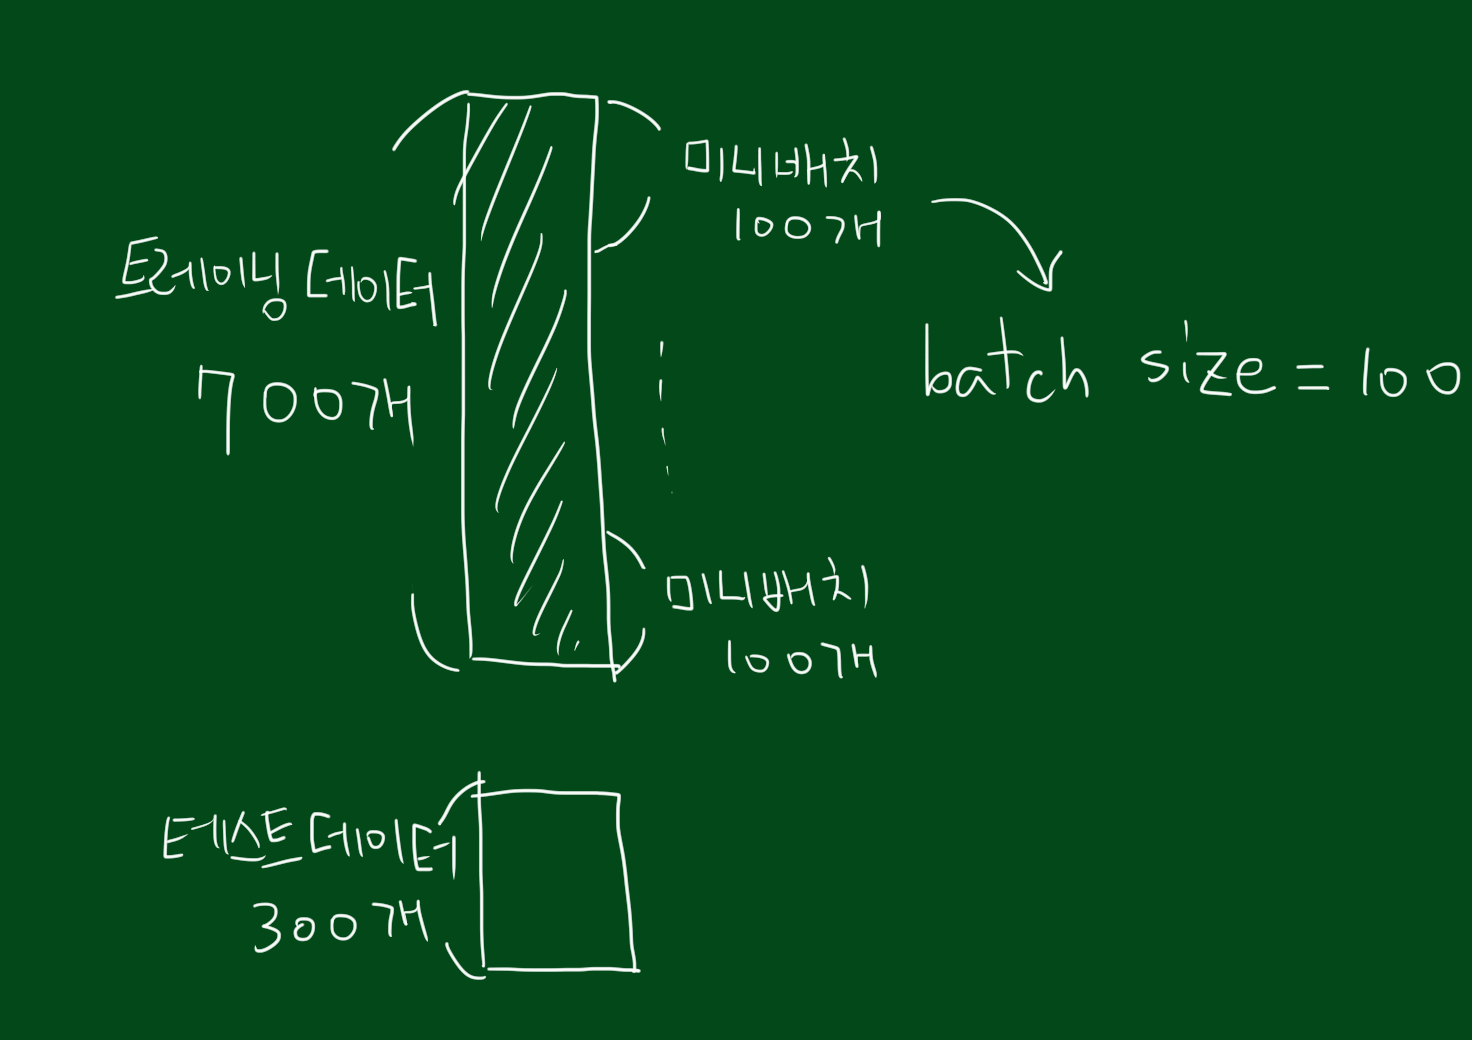

In [23]:
from IPython.display import Image
Image('epoch01.jpg', width = 300, height = 400)

In [24]:
history = model.fit(train_oh, train_target, epochs= 100, batch_size = 64, 
                   validation_data = (val_oh, val_target), 
                   callbacks = [checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 19ms/step - loss: 0.6981 - accuracy: 0.5202 - val_loss: 0.6956 - val_accuracy: 0.5212
Epoch 2/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6921 - accuracy: 0.5332 - val_loss: 0.6907 - val_accuracy: 0.5312
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6869 - accuracy: 0.5498 - val_loss: 0.6857 - val_accuracy: 0.5504
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6788 - accuracy: 0.5753 - val_loss: 0.6727 - val_accuracy: 0.5938
Epoch 5/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6553 - accuracy: 0.6232 - val_loss: 0.6430 - val_accuracy: 0.6438
Epoch 6/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6351 - accuracy: 0.6547 - val_loss: 0.6309 - val_accuracy: 0.6568
Epoch 7/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6181 - accuracy: 0.6740 - val_loss: 0.6116 - val_accuracy:

313/313 [==============================] - 6s 18ms/step - loss: 0.4086 - accuracy: 0.8227 - val_loss: 0.4720 - val_accuracy: 0.7800
Epoch 58/100
313/313 [==============================] - 6s 18ms/step - loss: 0.4078 - accuracy: 0.8216 - val_loss: 0.4755 - val_accuracy: 0.7784


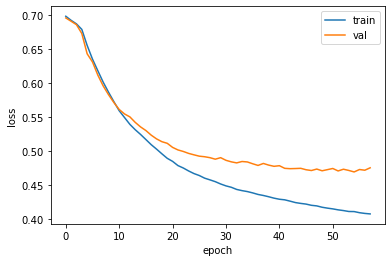

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

#### 원핫 인코딩의 단점은 입력 데이터가 엄청 커진다는 것

실제로 train_seq 배열과 train_oh 배열의 nbytes 속성 출력해보자

In [26]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


### 단어 임베딩 사용하기 word embedding

단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꾸어 준다

one-hot encoding 보다 훨씬 의미 있음 ---> 좋은 성능 냄!

장점은 정수 데이터를 받는다는 점! 

(100,) 크기 샘플을 (100,20) 크기의 2차원 배열로 늘린다 ---> 훨씬 작은 크기!

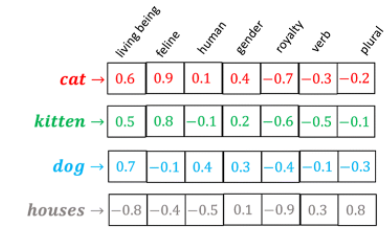

In [27]:
from IPython.display import Image
Image('word_embedding.PNG', width = 400, height = 500)

In [28]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100)) # 16 : 임베딩 벡터의 크기, input_length : 입력 샘플 길이 100
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation ='sigmoid'))

In [29]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


(100, ) 크기를 받아 (100,16) 크기로 출력

Embedding 은 500개의 각 토큰을 크기가 16인 벡터로 변경하기 때문에 500 * 16 = 8000 개의 모델 파라미터를 가짐

SImple RNN층은 임베딩 벡터의 크기가 16이므로 8개의 뉴런과 곱하기 위해 필요한 가중치 16* 8 = 128개를 가진다.

은닉 상태에 곱해지는 가중치 8 * 8 = 64개 존재

8개의 절편

따라서 128 + 64 + 8  = 200 개

In [30]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience =3, restore_best_weights = True)

In [31]:
history = model2.fit(train_seq, train_target, epochs= 100, batch_size = 64, 
                   validation_data = (val_seq, val_target), 
                   callbacks = [checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6686 - accuracy: 0.5858 - val_loss: 0.6298 - val_accuracy: 0.6634
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6049 - accuracy: 0.6978 - val_loss: 0.5910 - val_accuracy: 0.7192
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5709 - accuracy: 0.7398 - val_loss: 0.5666 - val_accuracy: 0.7428
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5490 - accuracy: 0.7578 - val_loss: 0.5544 - val_accuracy: 0.7442
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5324 - accuracy: 0.7689 - val_loss: 0.5346 - val_accuracy: 0.7656
Epoch 6/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5175 - accuracy: 0.7783 - val_loss: 0.5278 - val_accuracy: 0.7610
Epoch 7/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5045 - accuracy: 0.7866 - val_loss: 0.5146 - val_accuracy:

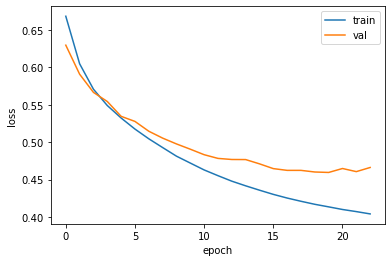

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()